
---

# Análise exploratória de dados: Retail Sales Dataset
Dataset Kaggle: [Retail Sales Dataset](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset) <br>
Projeto no Kaggle: xxx <br>
Autor: Bruno Pereira <br>

---

Próximas coisas pra fazer:
- Melhorar os insights encontrados
- Adicionar apenas a quantidade de vendas e valor vendido por mês

## 1. Contexto

**Descrição do Problema/Base de dados:** Este dataset contém dados fictícios de vendas do varejo e caracrerísticas dos compradores, permitindo que consigamos extrair insights além de obter uma compreensão mais profunda do comportamento de compra dos clientes. Meu objetivo é fazer uma análise exploratória desses dados e traduzí-los e insights valiosos. Utilizei como guia os conceitos ensinados pela EBAC(Escola Britânica de Artes e Tecnologia) e principalmente o livro: Estatística Prática para Cientistas de Dados(Autores: Peter Bruce & Andrew Bruce)

Explicação de cada uma das colunas do dataset
1. **Transaction ID(ID da transação):** Um identificador único para cada transação, permitindo rastreamento e referência.

2. **Date(Data):** A data em que a transação ocorreu, fornecendo insights sobre as tendências de vendas ao longo do tempo.

3. **Customer ID(ID do Cliente):** Um identificador exclusivo para cada cliente, permitindo uma análise centrada no cliente.

4. **Gender(Gênero):** O gênero do cliente (masculino/feminino), oferecendo insights sobre padrões de compra baseados em gênero.

5. **Age(Idade):** A idade do cliente, facilitando a segmentação e exploração de influências relacionadas à idade.

6. **Product Category(Categoria do Produto):** A categoria do produto adquirido (Ex.: Eletrônicos, Roupas, Beleza), ajudando a entender as preferências do produto.

7. **Quantity(Quantidade):** O número de unidades do produto adquirido, contribuindo para insights sobre os volumes de compra.

8. **Price per Unit(Preço por Unidade):** O preço de uma unidade do produto, auxiliando nos cálculos relativos ao gasto total.

9. **Total Amount(Valor da Compra):** O valor monetário total da transação, mostrando o impacto financeiro de cada compra.

**OBS**: Durante minhas análises utilizarei o valor monetário $(Dólar)

## 2. Pacotes, bibliotecas & Importações

Pacotes utilizados

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Funções desenvolvidas que serão utilizadas

In [3]:
# Definindo palheta de cores fixas para os atributos categóricos
palette_product_category = {
    "Clothing": "#ff9999",   # Vermelho claro
    "Electronics": "#66b3ff", # Azul claro
    "Beauty": "#99ff99"      # Verde claro
}

palete_gender = {
    'Female': "#f25f9a", # Rosa claro
    'Male': "#e6f4f1" # Branco
}

# Função utilizada para verificar os valores únicos
def verifica_valores_unicos(DataFrame: pd.DataFrame, colunas_ignoradas: list|str|None) -> None:
    for x in DataFrame.columns:
    
        if type(colunas_ignoradas) == str:
            if x != colunas_ignoradas:
                print('++'*30)
                print(f'NOME DA COLUNA COLUNA: "{x}"')
                print('--'*5)
                print('VALORES ÚNICOS:')
                print(f'{DataFrame[x].unique()}')
                print('--'*5)
                print(f'CONTAGEM DOS VALORES ÚNICOS: {len(DataFrame[x].unique())}')
                print('++'*30)
                print('\n')
        
        elif type(colunas_ignoradas) == list:
            if x not in colunas_ignoradas:
                print('++'*30)
                print(f'NOME DA COLUNA COLUNA: "{x}"')
                print('--'*5)
                print('VALORES ÚNICOS:')
                print(f'{DataFrame[x].unique()}')
                print('--'*5)
                print(f'CONTAGEM DOS VALORES ÚNICOS: {len(DataFrame[x].unique())}')
                print('++'*30)
                print('\n')

        else:
            print('++'*30)
            print(f'NOME DA COLUNA COLUNA: "{x}"')
            print('--'*5)
            print('VALORES ÚNICOS:')
            print(f'{DataFrame[x].unique()}')
            print('--'*5)
            print(f'CONTAGEM DOS VALORES ÚNICOS: {len(DataFrame[x].unique())}')
            print('++'*30)
            print('\n')
# Cria o gráfico de BoxPlot
def gerador_boxplot(data, y: str, x: str = None, eixos=None, valor_eixos: int | list = 0, title: str = "", y_label: str = "", palette=None ) -> None:
    
    if isinstance(eixos, int):  # Correção: usar isinstance() para verificar tipos
        sns.boxplot(data=data, y=y, x=x, color='skyblue', palette=palette, ax=eixos[valor_eixos])
        eixos[valor_eixos].set_title(title, fontsize=12)
        eixos[valor_eixos].set_ylabel(y_label, fontsize=10)
    else:
        sns.boxplot(data=data, y=y, x=x, color='skyblue', palette=palette, ax=eixos[valor_eixos[0]][valor_eixos[1]])
        eixos[valor_eixos[0]][valor_eixos[1]].set_title(title, fontsize=12)
        eixos[valor_eixos[0]][valor_eixos[1]].set_ylabel(y_label, fontsize=10)

# Cria o rótulo de dados de cada barra (No topo da barra)
def cria_rotulos_barras(histrgrama, grid, posicao_grid: int|list, fontsize: int, binwidth_value: int) -> None:
    
    for p in histrgrama.patches:
        
        height = p.get_height() # 'Altura' da barra, nesse caso a frequência
        
        if type(posicao_grid) == int:
            # Adicionar rótulo da frequência (no topo da barra)
            if height != 0: # Não adiciona o rótulo caso a barra exteja com o valor zerado
                grid[posicao_grid].annotate(f"{int(height)}", 
                                (p.get_x() + binwidth_value / 2, height + 1), 
                                ha="center", fontsize=fontsize, fontweight="bold")
        else:
            # Adicionar rótulo da frequência (no topo da barra)
            if height != 0: # Não adiciona o rótulo caso a barra exteja com o valor zerado
                grid[posicao_grid[0]][posicao_grid[1]].annotate(f"{int(height)}", 
                                (p.get_x() + binwidth_value / 2, height + 1), 
                                ha="center", fontsize=fontsize, fontweight="bold")

# Cria o rótulo do intervalo de cada bin do histograma (Dentro da barra)
def rotula_intervalo_bins(DataFrame: pd.DataFrame, column:str, histrgrama, grid ,posicao_grid: int|list, fontsize: int, binwidth_value: int) -> None:

    max_value = DataFrame[column].max()
    for p in histrgrama.patches:
        
        height = p.get_height()  # 'Altura' da barra, ou seja, a frequência

        bin_left = p.get_x()     # Valor esquerdo do bin
        bin_right = bin_left + binwidth_value  # Limite direito do bin (exclusivo)

        # Ajustar o último rótulo se bin_right ultrapassar max_value (Podem haver casos em que o último bin seja maior)
        if bin_right >= max_value:
            bin_right = max_value  # Último bin terminará no valor máximo real
            bin_range_label = f"{int(bin_left)} - {int(bin_right)}"
        else:
            # Criar o rótulo do intervalo [bin_left, bin_right - 1], isso pois a frequência do histgrama e os rótulos estavam divergentes
            bin_range_label = f"{int(bin_left)} - {int(bin_right) - 1}"

        if type(posicao_grid) == int:
            if height != 0:  # Não adiciona o rótulo caso a barra exteja com o valor zerado
                # Adicionar rótulo do intervalo (dentro da barra)
                grid[posicao_grid].annotate(bin_range_label, 
                                    (p.get_x() + binwidth_value / 2, height / 2), 
                                    ha='center', va='center', fontsize=fontsize, color='black', rotation=90)
        else:
            if height != 0:  # Não adiciona o rótulo caso a barra exteja com o valor zerado
                # Adicionar rótulo do intervalo (dentro da barra)
                grid[posicao_grid[0]][posicao_grid[1]].annotate(bin_range_label, 
                                    (p.get_x() + binwidth_value / 2, height / 2), 
                                    ha='center', va='center', fontsize=fontsize, color='black', rotation=90)

# Cria o rótulo percentual de cada um dos segmentos das barras (Dentro da barra)
def rotula_percentual_segmentado_barras(histograma, grid, posicao_grid:int|list, fontsize: int) -> None:

    # Criar um dicionário para armazenar a soma de valores de cada bin
    bin_totals = {}

    # Primeira passada para obter os totais por bin
    for patch in histograma.patches:
        x_start = patch.get_x()
        x_end = x_start + patch.get_width()
        bin_mid = (x_start + x_end) / 2  # Centro do bin

        if bin_mid not in bin_totals:
            bin_totals[bin_mid] = 0
        bin_totals[bin_mid] += patch.get_height()  # Soma os valores do bin

    # Segunda passada para adicionar os rótulos percentuais
    for patch in histograma.patches:
        height = patch.get_height()
        x_start = patch.get_x()
        x_end = x_start + patch.get_width()
        bin_mid = (x_start + x_end) / 2  # Centro do bin

        if type(posicao_grid) == int:
            if height > 0:
                percent = (height / bin_totals[bin_mid]) * 100  # Calcula percentual
                grid[posicao_grid].text(bin_mid, patch.get_y() + height / 2, f'{percent:.1f}%', ha='center', va='center', fontsize=fontsize, color='black', rotation=90)
        else:
            if height > 0:
                percent = (height / bin_totals[bin_mid]) * 100  # Calcula percentual
                grid[posicao_grid[0]][posicao_grid[1]].text(bin_mid, patch.get_y() + height / 2, f'{percent:.1f}%', ha='center', va='center', fontsize=fontsize, color='black', rotation=90)

## 3. Exploração Inicial dos dados

Leitura do dataset

In [6]:
df = pd.read_csv("../Retail Sales Dataset.csv")

Visualização inicial dos dados

In [7]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


**Conclusão:** Podemos notar que o DataFrame é bom limpo e consistente, sendo necessário apenas algumas conversões do tipo de alguns dados e talvez excluir algumas colunas. Notamos também que a maioria dos atributos são do tipo numérico, especificamente numéricos discretos(```Total Amount```, ```Price per Unit```, ```Quantity```, ```Age```, ```Transaction ID```). Também existem duas colunas categóricas nominais(```Customer ID```, ```Gender```, ```Product Category```), e uma coluna de data(```Date```).

Utilização da função ```verifica_valores_unicos``` para entendermos mais profundamente como estão distribuídos os dados em cada um dos atributos

In [9]:
verifica_valores_unicos(df, colunas_ignoradas=['Date','Price per Unit','Total Amount'])

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
NOME DA COLUNA COLUNA: "Transaction ID"
----------
VALORES ÚNICOS:
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172

Também existe uma coluna de data, vamos entender inicialmente o período temporal que esse dataset contempla

In [10]:
df['Date'].min(), df['Date'].max()

('2023-01-01', '2024-01-01')

## 4. Wrangling

Depois dessa breve análise faremos alguns tratamentos, iniciando com a exclusão de algumas colunas que não impactarão em nossas futuras análises, sendo elas: ```Customer ID``` e ```Transaction ID```

In [11]:
df.drop(columns=['Transaction ID', 'Customer ID'], inplace=True)

Também faremos as conversão dos valores dos atributos para seus respectivos tipos, isso deixa nossa base de dados mais otimizada consumindo menos recusos computacionais, por mais que nossa base é pequena é uma boa prática.

In [12]:
df['Date'] = pd.to_datetime(df['Date']) # Converter de object para datetime
df['Gender'] = df['Gender'].astype("category") # Converter de object para o tipo category
df['Product Category'] = df['Product Category'].astype("category") # Converter de object para o tipo category

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   category      
 2   Age               1000 non-null   int64         
 3   Product Category  1000 non-null   category      
 4   Quantity          1000 non-null   int64         
 5   Price per Unit    1000 non-null   int64         
 6   Total Amount      1000 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(4)
memory usage: 41.4 KB


In [14]:
total_registros_df = len(df)

## 5. Análise Exploratória

### Análise dos Atributos Categóricos

In [16]:
df.drop_duplicates(subset='Date').info()

<class 'pandas.core.frame.DataFrame'>
Index: 345 entries, 0 to 987
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              345 non-null    datetime64[ns]
 1   Gender            345 non-null    category      
 2   Age               345 non-null    int64         
 3   Product Category  345 non-null    category      
 4   Quantity          345 non-null    int64         
 5   Price per Unit    345 non-null    int64         
 6   Total Amount      345 non-null    int64         
dtypes: category(2), datetime64[ns](1), int64(4)
memory usage: 17.1 KB


In [20]:
df.describe(include='category')

,Gender,Product Category
count,1000,1000
unique,2,3
top,Female,Clothing
freq,510,351


#### Atributo: ```Gender``` & ```Product Category```

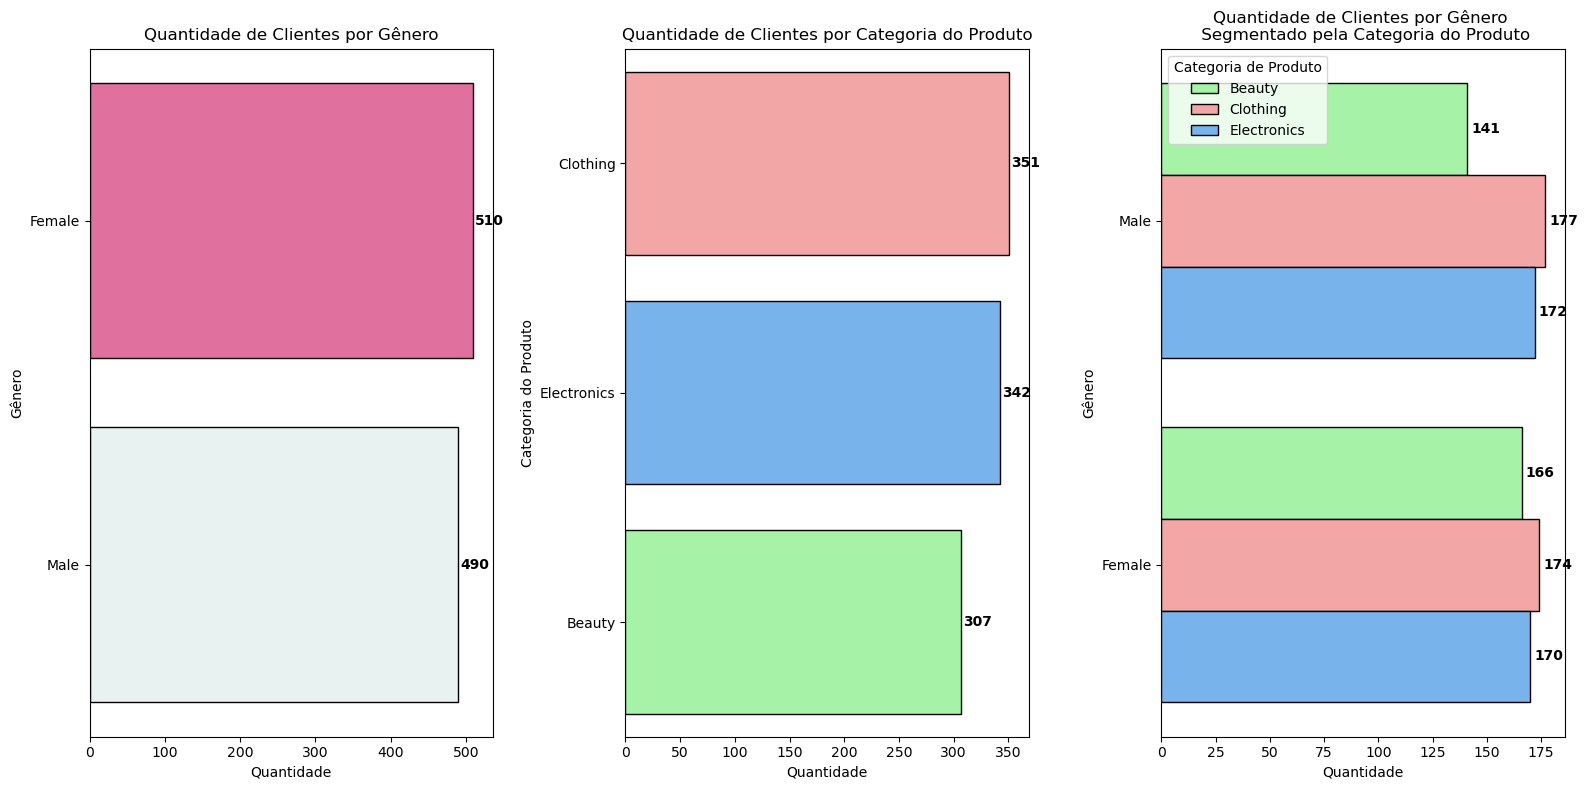

In [24]:
# Criar a figura com três gráficos lado a lado
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

# 🎯 Gráfico 1: Quantidade de Clientes por Gênero
gender_order = df["Gender"].value_counts().index  # Ordenar categorias pela contagem
sns.countplot(data=df, y="Gender", palette=palete_gender, edgecolor="black", ax=axes[0],order=gender_order)
axes[0].set_title("Quantidade de Clientes por Gênero", fontsize=12)
axes[0].set_xlabel("Quantidade", fontsize=10)
axes[0].set_ylabel("Gênero", fontsize=10)

# Adicionar rótulos de valores dentro das barras
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_width())}', 
                     (p.get_width() + 2, p.get_y() + p.get_height()/2), 
                     ha='left', va='center', fontsize=10, fontweight="bold")

# 🎯 Gráfico 2: Quantidade de Clientes por Categoria do Produto (Ordenado)
product_category_order = df["Product Category"].value_counts().index  # Ordenar categorias pela contagem
sns.countplot(data=df, y="Product Category", palette=palette_product_category, edgecolor="black", ax=axes[1], order=product_category_order)
axes[1].set_title("Quantidade de Clientes por Categoria do Produto", fontsize=12)
axes[1].set_xlabel("Quantidade", fontsize=10)
axes[1].set_ylabel("Categoria do Produto", fontsize=10)

# Adicionar rótulos de valores dentro das barras
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_width())}', 
                     (p.get_width() + 2, p.get_y() + p.get_height()/2), 
                     ha='left', va='center', fontsize=10, fontweight="bold")

# 🎯 Gráfico 3: Quantidade de Clientes por Gênero Segmentado pelo Product Category
sns.countplot(data=df, y="Gender", hue="Product Category", palette=palette_product_category, edgecolor="black", ax=axes[2])
axes[2].set_title("Quantidade de Clientes por Gênero \n Segmentado pela Categoria do Produto", fontsize=12)
axes[2].set_xlabel("Quantidade", fontsize=10)
axes[2].set_ylabel("Gênero", fontsize=10)
axes[2].legend(title="Categoria de Produto", loc="upper left")  # Mover legenda para o canto superior esquerdo

# Adicionar rótulos de valores dentro das barras do gráfico 3
for p in axes[2].patches:
    axes[2].annotate(f'{int(p.get_width())}', 
                     (p.get_width() + 2, p.get_y() + p.get_height()/2), 
                     ha='left', va='center', fontsize=10, fontweight="bold")

# Ajustar layout
plt.tight_layout()
plt.show()


**Explicação**: Podemos notar que as categorias da nossa base de dados estão bem distribuídas, sem um valor muito discrepante dos demais. Observando o atributo gênero, notamos que nossa amostra possui 2% mais clientes mulheres do que homens. O atributo Categoria do Produto, possui como moda o tipo Clothing(Roupas). Analisando a quantidade de produtos adquiridos segmentados por gênero e por Categoria do produto, notamos uma distribuição bem harmônica, porém com os homens comprando menos protudos de Beauty(Beleza) do que as mulheres.

### Análise exploratória dos atributos Numéricos

In [18]:
df.describe(include='int64')

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


#### Atributo: ```Age```

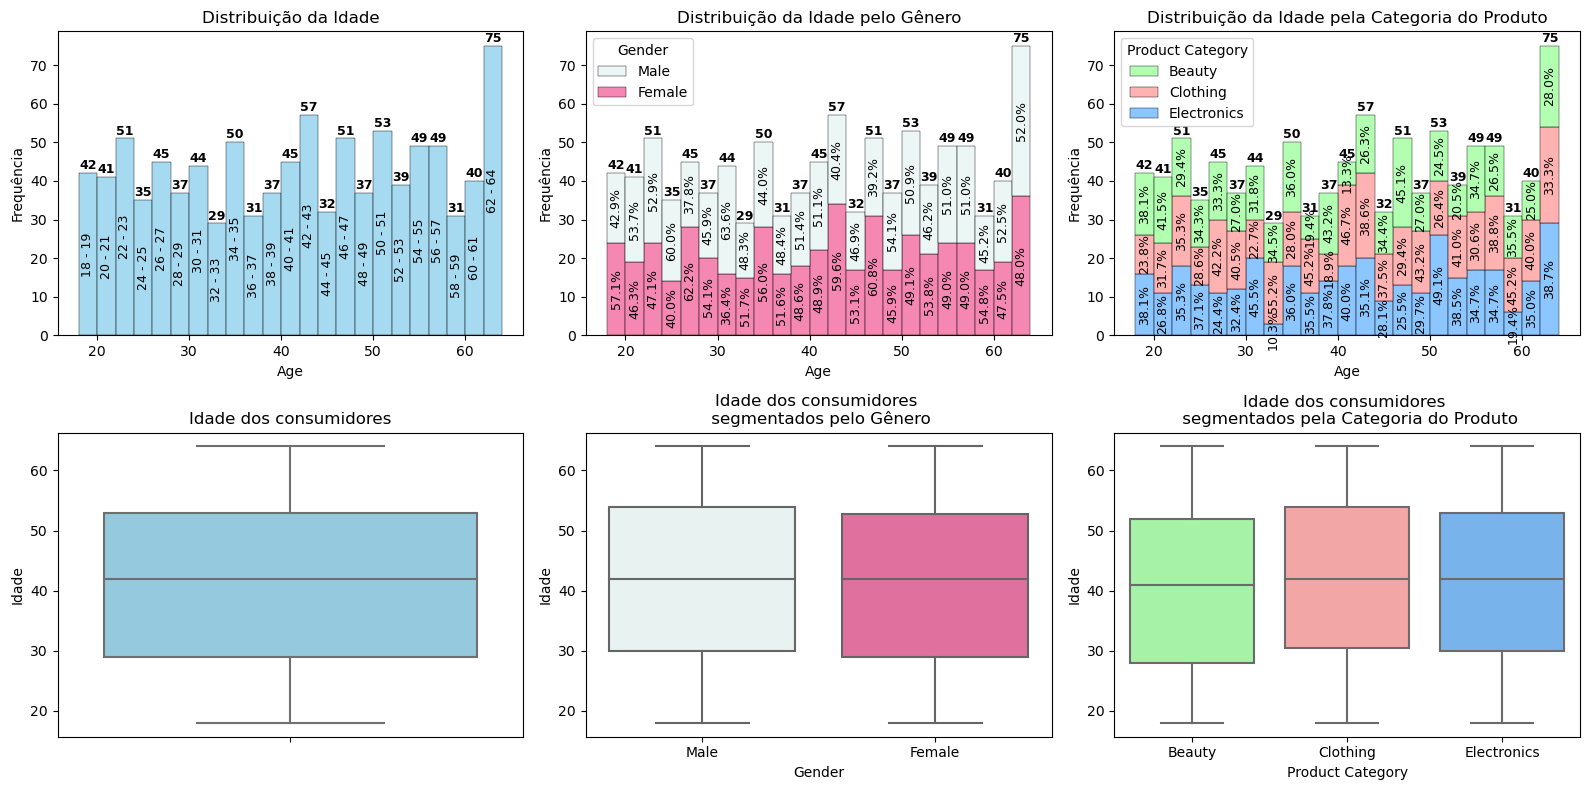

In [25]:
# Criação dos Grids 1x3
janela, graficos = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

# Gráfico 1
#-----------
binwidth_value = 2
fontsize = 9

# Criação do histograma
histplot = sns.histplot(data=df, x='Age', binwidth=2, ax=graficos[0][0], edgecolor="black", linewidth=0.3, color='skyblue')

cria_rotulos_barras(histrgrama=histplot, grid=graficos, posicao_grid=[0,0], fontsize=fontsize, binwidth_value=binwidth_value)

rotula_intervalo_bins(DataFrame=df, column='Age', histrgrama=histplot, grid=graficos, posicao_grid=[0,0], fontsize=fontsize, binwidth_value=binwidth_value)

graficos[0][0].set_title('Distribuição da Idade', fontsize=12)
graficos[0][0].set_xlabel('Age', fontsize=10)
graficos[0][0].set_ylabel('Frequência', fontsize=10)

# 📌 Gráfico 2 (Frequência + Percentuais por Gender)
histplot2 = sns.histplot(data=df, x='Age', hue='Gender', binwidth=2, multiple="stack", ax=graficos[0][1], edgecolor="black", linewidth=0.3, palette=palete_gender)

cria_rotulos_barras(histrgrama=histplot, grid=graficos, posicao_grid=[0,1], fontsize=fontsize, binwidth_value=binwidth_value)

rotula_percentual_segmentado_barras(histograma=histplot2, grid=graficos, posicao_grid=[0,1], fontsize=fontsize)

graficos[0][1].set_title('Distribuição da Idade pelo Gênero', fontsize=12)
graficos[0][1].set_xlabel('Age', fontsize=10)
graficos[0][1].set_ylabel('Frequência', fontsize=10)

# Criação do gráfico 3
histplot3 = sns.histplot(data=df, x='Age', hue='Product Category', binwidth=2,  multiple="stack", ax=graficos[0][2], edgecolor="black", linewidth=0.3, palette=palette_product_category)

cria_rotulos_barras(histrgrama=histplot, grid=graficos, posicao_grid=[0,2], fontsize=fontsize, binwidth_value=binwidth_value)

rotula_percentual_segmentado_barras(histograma=histplot3, grid=graficos, posicao_grid=[0,2], fontsize=fontsize)

graficos[0][2].set_title('Distribuição da Idade pela Categoria do Produto', fontsize=12)
graficos[0][2].set_xlabel('Age', fontsize=10)
graficos[0][2].set_ylabel('Frequência', fontsize=10)


sns.boxplot(data=df, y='Age', x=None, color='skyblue', ax=graficos[1][0])
graficos[1][0].set_title('Idade dos consumidores', fontsize=12)
graficos[1][0].set_ylabel('Idade', fontsize=10)

sns.boxplot(data=df, y='Age', x='Gender', palette=palete_gender ,ax=graficos[1][1])
graficos[1][1].set_title('Idade dos consumidores \n segmentados pelo Gênero', fontsize=12)
graficos[1][1].set_ylabel('Idade', fontsize=10)

sns.boxplot(data=df, y='Age', x='Product Category', palette=palette_product_category, ax=graficos[1][2])
graficos[1][2].set_title('Idade dos consumidores \n segmentados pela Categoria do Produto', fontsize=12)
graficos[1][2].set_ylabel('Idade', fontsize=10)

# Exibir os gráficos
plt.tight_layout()
plt.show()

In [123]:
maior_frequencia_etaria = (len(df.query("Age >= 60")) / total_registros_df) * 100
print(f'Clientes que possuém 60 ou mais anos representam {maior_frequencia_etaria}% da nossa base de dados')

Clientes que possuém 60 ou mais anos representam 11.5% da nossa base de dados


**Explicação**: Notamos que a faita etária da nossa amostra não possuem menores de idade, todos os clientes tem idade acima de 18 anos, com a amplitude etária entre 18 anos e 64 anos. Nota-se principalmente que a faixa etária com maior quantidade de clientes em nossa amostra possui entre 62 a 64 anos, representando 7,5%, e 11,15% tem idade igual ou maior a 60 anos. Observamos também que não há um insight claro que podemos tirar segmentando pela idade ou pela categoria do produto.

#### Atributo: ```Quantity```

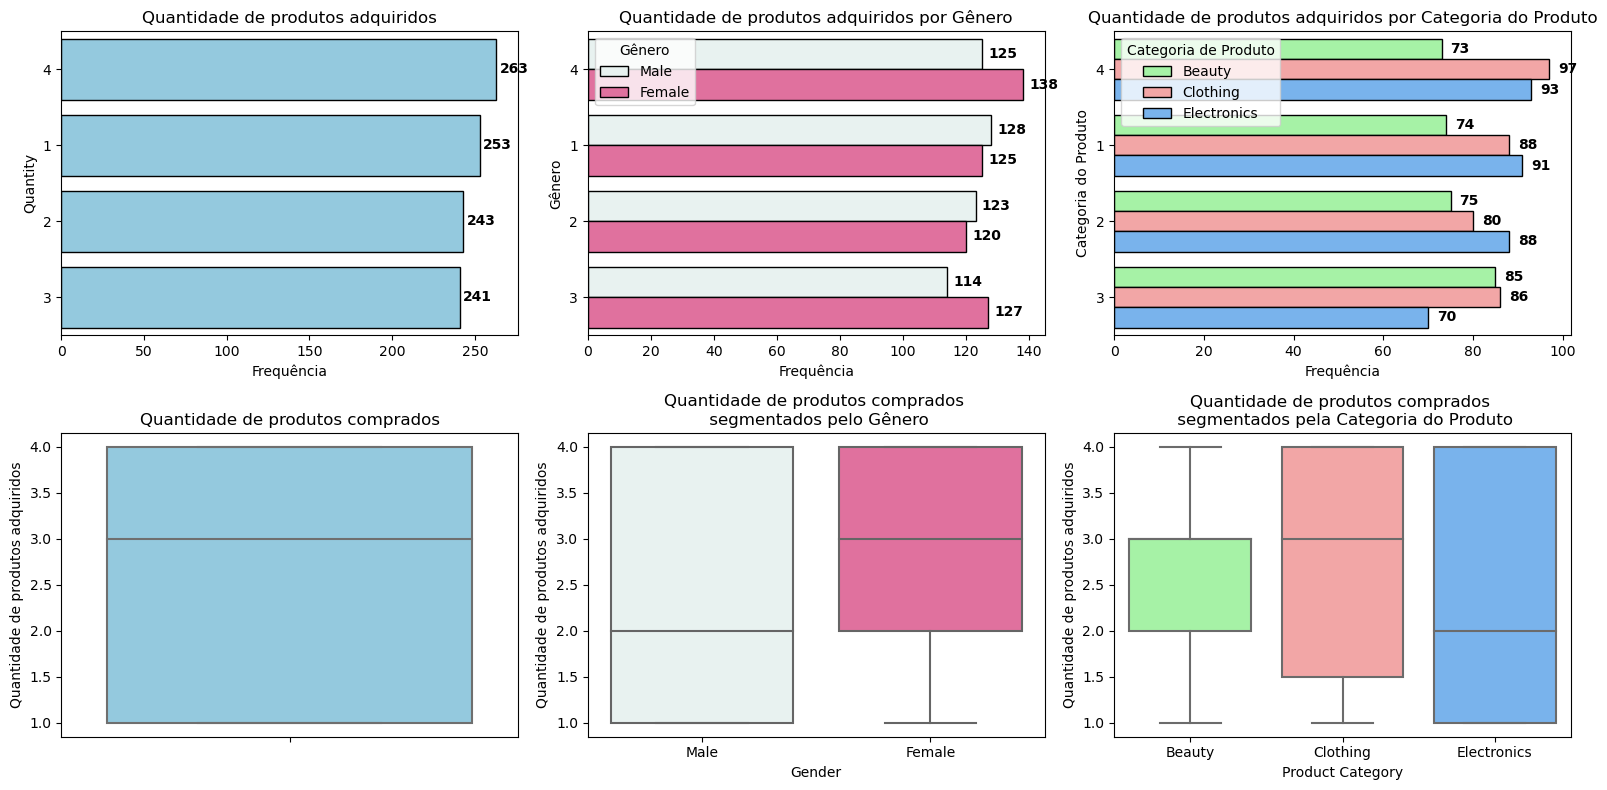

In [27]:
# Ordenação dos gráficos com base na frequência de compras por preço da unidade
order = df.groupby("Quantity")["Quantity"].value_counts().sort_values(ascending=False).index

# Criar a figura com três gráficos lado a lado
fig, graficos = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# 🎯 Gráfico 1: Quantidade de produtos adquiridos
sns.countplot(data=df, y="Quantity", color='skyblue', edgecolor="black", order=order, ax=graficos[0][0])
graficos[0][0].set_title("Quantidade de produtos adquiridos", fontsize=12)
graficos[0][0].set_xlabel("Frequência", fontsize=10)
graficos[0][0].set_ylabel("Quantity", fontsize=10)

# Adicionar rótulos de valores dentro das barras
for p in graficos[0][0].patches:
    graficos[0][0].annotate(f'{int(p.get_width())}', 
                     (p.get_width() + 2, p.get_y() + p.get_height()/2), 
                     ha='left', va='center', fontsize=10, fontweight="bold")

# 🎯 Gráfico 2: Quantidade de produtos adquiridos segmentados por Gênero
sns.countplot(data=df, y="Quantity", hue="Gender", edgecolor="black", order=order, ax=graficos[0][1], palette=palete_gender)
graficos[0][1].set_title("Quantidade de produtos adquiridos por Gênero", fontsize=12)
graficos[0][1].set_xlabel("Frequência", fontsize=10)
graficos[0][1].set_ylabel("Gênero", fontsize=10)
graficos[0][1].legend(title="Gênero", loc="upper left")

# Adicionar rótulos de valores dentro das barras do gráfico 3
for p in graficos[0][1].patches:
    graficos[0][1].annotate(f'{int(p.get_width())}', 
                     (p.get_width() + 2, p.get_y() + p.get_height()/2), 
                     ha='left', va='center', fontsize=10, fontweight="bold")


# 🎯 Gráfico 3: Quantidade de produtos adquiridos segmentados por categoria
sns.countplot(data=df, y="Quantity", hue="Product Category", edgecolor="black", order=order, ax=graficos[0][2], palette=palette_product_category)
graficos[0][2].set_title("Quantidade de produtos adquiridos por Categoria do Produto", fontsize=12)
graficos[0][2].set_xlabel("Frequência", fontsize=10)
graficos[0][2].set_ylabel("Categoria do Produto", fontsize=10)
graficos[0][2].legend(title="Categoria de Produto", loc="upper left")

# Adicionar rótulos de valores dentro das barras
for p in graficos[0][2].patches:
    graficos[0][2].annotate(f'{int(p.get_width())}', 
                     (p.get_width() + 2, p.get_y() + p.get_height()/2), 
                     ha='left', va='center', fontsize=10, fontweight="bold")

gerador_boxplot(data=df, y='Quantity', eixos=graficos, valor_eixos=[1,0], title='Quantidade de produtos comprados', y_label='Quantidade de produtos adquiridos')
gerador_boxplot(data=df, y='Quantity', x='Gender', eixos=graficos, valor_eixos=[1,1], title='Quantidade de produtos comprados \n segmentados pelo Gênero', y_label='Quantidade de produtos adquiridos', palette=palete_gender)
gerador_boxplot(data=df, y='Quantity', x='Product Category', eixos=graficos, valor_eixos=[1,2], title='Quantidade de produtos comprados \n segmentados pela Categoria do Produto', y_label='Quantidade de produtos adquiridos', palette=palette_product_category)

# Ajustar layout
plt.tight_layout()
plt.show()


In [122]:
mais_de_um_protudo_adquirido = (len(df[(df['Quantity']>1) & (df['Quantity']<=4)]) / total_registros_df) * 100
print(f'{mais_de_um_protudo_adquirido}% dos clientes adquiriram mais de 1 produto')

74.7% dos clientes adquiriram mais de 1 produto


**Explicação** Podemos observar alguns detalhes interessantes:
1. Em nossa amostra, os consumidores tem um comportamento de comprar até no máximo 4 produtos por compra, e aproximadamente 75% dos clientes analisados tem o comportamento de comprar mais de 1 produto;
2. O maior comportamento de compras dos clientes(Frequência ou Moda) é adquirir 4 produtos por compra; 
3. O público feminino se destaca por comprar mais produtos, liderando os rankings de 3 e 4 produtos adquiridos por compra;
4. A a categoria ```Beauty``` é a com menor quantidade de produtos comprados por compra em 3 dos 4 rankings, também é o produto com menor variabilidade, como pode ser observado no 3º gráfico de Boxplot.

#### Atributo: ```Price per Unit```

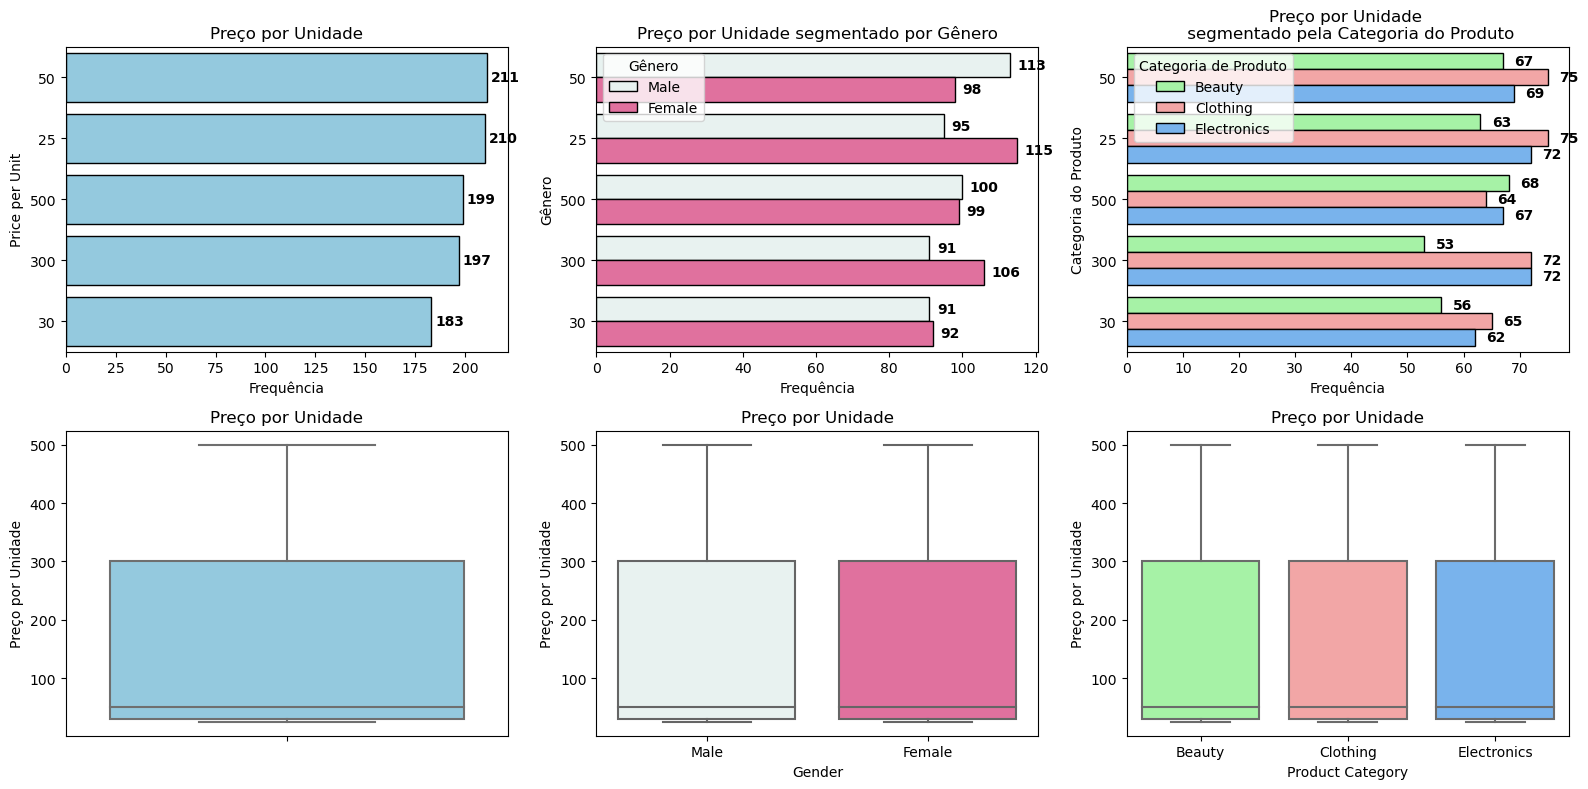

In [29]:
# Ordenação dos gráficos com base na frequência de compras por preço da unidade
order = df.groupby("Price per Unit")["Price per Unit"].value_counts().sort_values(ascending=False).index

# Criar a figura com três gráficos lado a lado
fig, graficos = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# 🎯 Gráfico 1: Quantidade de produtos adquiridos
sns.countplot(data=df, y="Price per Unit", order=order ,color='skyblue', edgecolor="black", ax=graficos[0][0])
graficos[0][0].set_title("Preço por Unidade", fontsize=12)
graficos[0][0].set_xlabel("Frequência", fontsize=10)
graficos[0][0].set_ylabel("Price per Unit", fontsize=10)

# Adicionar rótulos de valores dentro das barras
for p in graficos[0][0].patches:
        graficos[0][0].annotate(f'{int(p.get_width())}', 
                            (p.get_width() + 2, p.get_y() + p.get_height()/2), 
                            ha='left', va='center', fontsize=10, fontweight="bold")
        


# 🎯 Gráfico 2: Quantidade de produtos adquiridos segmentados por Gênero
sns.countplot(data=df, y="Price per Unit", order=order, hue="Gender", edgecolor="black", ax=graficos[0][1], palette=palete_gender)
graficos[0][1].set_title("Preço por Unidade segmentado por Gênero", fontsize=12)
graficos[0][1].set_xlabel("Frequência", fontsize=10)
graficos[0][1].set_ylabel("Gênero", fontsize=10)
graficos[0][1].legend(title="Gênero", loc="upper left")

# Adicionar rótulos de valores dentro das barras do gráfico 3
for p in graficos[0][1].patches:
    graficos[0][1].annotate(f'{int(p.get_width())}', 
                    (p.get_width() + 2, p.get_y() + p.get_height()/2), 
                    ha='left', va='center', fontsize=10, fontweight="bold")


# 🎯 Gráfico 3: Quantidade de produtos adquiridos segmentados por categoria
sns.countplot(data=df, y="Price per Unit",hue="Product Category", order=order, edgecolor="black", ax=graficos[0][2], palette=palette_product_category)
graficos[0][2].set_title("Preço por Unidade \n segmentado pela Categoria do Produto", fontsize=12)
graficos[0][2].set_xlabel("Frequência", fontsize=10)
graficos[0][2].set_ylabel("Categoria do Produto", fontsize=10)
graficos[0][2].legend(title="Categoria de Produto", loc="upper left")

# Adicionar rótulos de valores dentro das barras
for p in graficos[0][2].patches:
    graficos[0][2].annotate(f'{int(p.get_width())}', 
                     (p.get_width() + 2, p.get_y() + p.get_height()/2), 
                     ha='left', va='center', fontsize=10, fontweight="bold")


sns.boxplot(data=df, y='Price per Unit', color='skyblue', ax=graficos[1][0])
graficos[1][0].set_title('Preço por Unidade', fontsize=12)
graficos[1][0].set_ylabel('Preço por Unidade', fontsize=10)

sns.boxplot(data=df, y='Price per Unit', x='Gender', palette=palete_gender ,ax=graficos[1][1])
graficos[1][1].set_title('Preço por Unidade', fontsize=12)
graficos[1][1].set_ylabel('Preço por Unidade', fontsize=10)

sns.boxplot(data=df, y='Price per Unit', x='Product Category', palette=palette_product_category, ax=graficos[1][2])
graficos[1][2].set_title('Preço por Unidade', fontsize=12)
graficos[1][2].set_ylabel('Preço por Unidade', fontsize=10)


# Ajustar layout
plt.tight_layout()
plt.show()




In [12]:
produtos_menores_que_51 = (len(df[df['Price per Unit'] <= 50]) / total_registros_df) * 100

print(f'{format(produtos_menores_que_51, ".2f")}% dos preços dos produtos são menores ou iguais a 50')

60.40% dos preços dos produtos são menores ou iguais a 50


**Conclusão**: Analisando esse critério notamos que existem mais produtos com os valores mais baixos, 60% deles custando $50 ou menos, como pode ser visualizado no gráfico de boxplot, onde a caixa está deslocada para baixo. A maior quantidade são de produtos custando exatamente $50, representando 21% de toda a amostra. Um fato curioso é que os produtos custando $30 são os que são menos adquiridos, talvez uma estratégia seria dar algum desconto para $25 visando a maior aderência do público, ou analisar se faz sentido ter esse produto nas prateleiras.

#### Atributo: ```Total Amount```

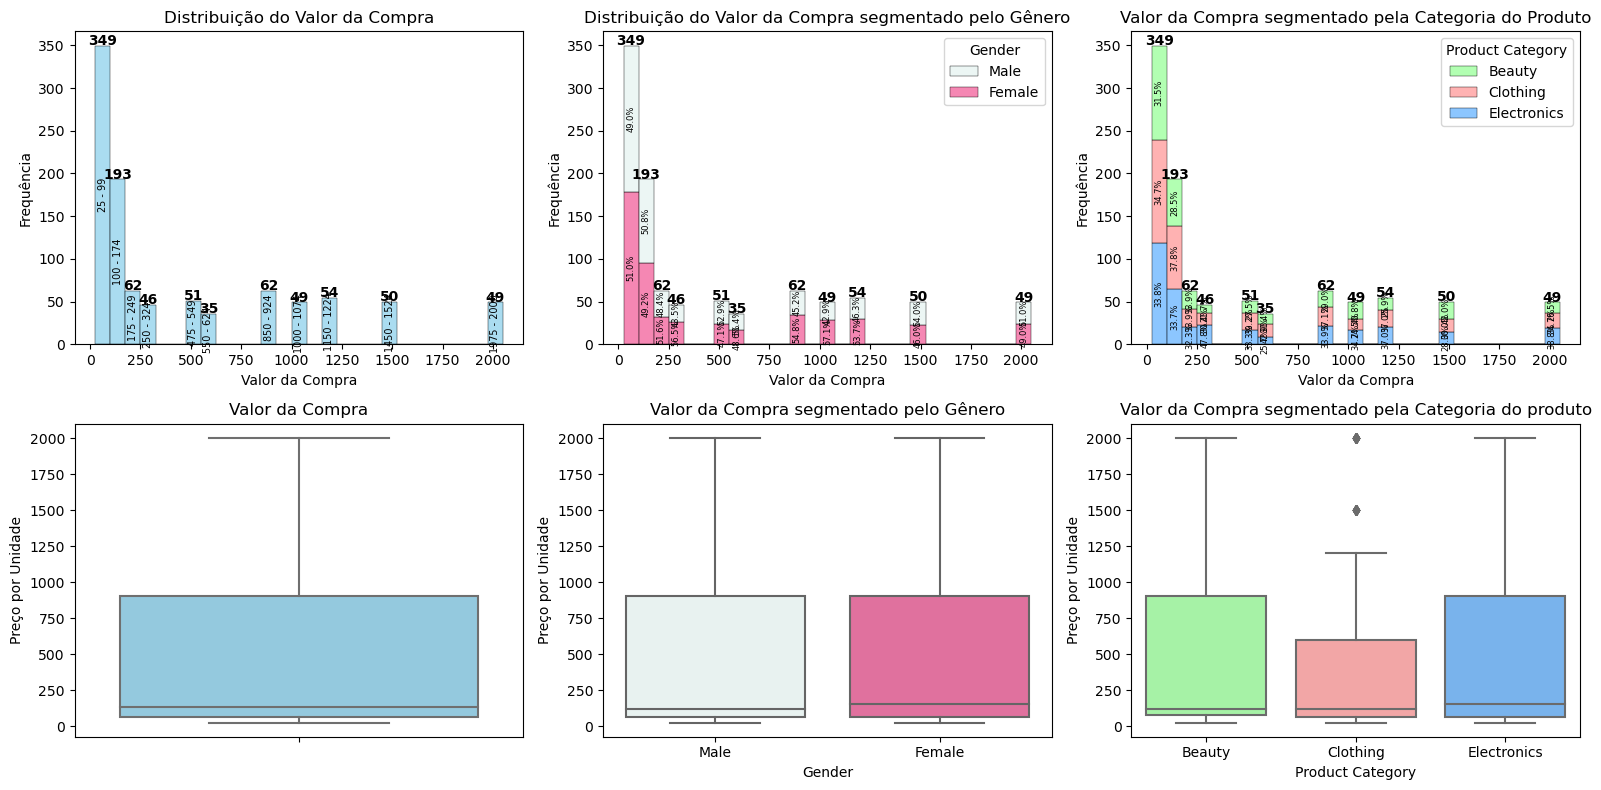

In [ ]:
# Criação dos Grids 3x2
janela, graficos = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

# Gráfico 1
#-----------
binwidth_value = 75  # Defina o tamanho do intervalo
fontsize = 7

histplot = sns.histplot(data=df, x='Total Amount', binwidth=binwidth_value, ax=graficos[0][0], edgecolor="black", alpha=0.7, linewidth=0.3, color='skyblue')
graficos[0][0].set_title('Distribuição do Valor da Compra', fontsize=12)
graficos[0][0].set_xlabel('Valor da Compra', fontsize=10)
graficos[0][0].set_ylabel("Frequência", fontsize=10)

cria_rotulos_barras(histrgrama=histplot, grid=graficos, posicao_grid=[0,0], fontsize= 10, binwidth_value=binwidth_value)

rotula_intervalo_bins(DataFrame=df, column='Total Amount', histrgrama=histplot, grid=graficos, posicao_grid=[0,0], fontsize=fontsize, binwidth_value=binwidth_value)

# 📌 Gráfico 2 (Frequência + Percentuais por Gender)
histplot2 = sns.histplot(data=df, x='Total Amount', hue='Gender', binwidth=binwidth_value, multiple="stack", ax=graficos[0][1], edgecolor="black", linewidth=0.3, palette=palete_gender)

cria_rotulos_barras(histrgrama=histplot, grid=graficos, posicao_grid=[0,1], fontsize= 10, binwidth_value=binwidth_value)

rotula_percentual_segmentado_barras(histograma=histplot2, grid=graficos, posicao_grid=[0,1], fontsize=6)

# Customizações adicionais do gráfico 1
graficos[0][1].set_title('Distribuição do Valor da Compra segmentado pelo Gênero', fontsize=12)
graficos[0][1].set_xlabel('Valor da Compra', fontsize=10)
graficos[0][1].set_ylabel('Frequência', fontsize=10)

# Criação do gráfico 3
histplot3 = sns.histplot(data=df, x='Total Amount', hue='Product Category', binwidth=binwidth_value,  multiple="stack", ax=graficos[0][2], edgecolor="black", linewidth=0.3, palette=palette_product_category)

cria_rotulos_barras(histrgrama=histplot, grid=graficos, posicao_grid=[0,2], fontsize= 10, binwidth_value=binwidth_value)

rotula_percentual_segmentado_barras(histograma=histplot3, grid=graficos, posicao_grid=[0,2], fontsize=6)

# Customizações adicionais do gráfico 1
graficos[0][2].set_title('Valor da Compra segmentado pela Categoria do Produto', fontsize=12)
graficos[0][2].set_xlabel('Valor da Compra', fontsize=10)
graficos[0][2].set_ylabel('Frequência', fontsize=10)

sns.boxplot(data=df, y='Total Amount', color='skyblue', ax=graficos[1][0])
graficos[1][0].set_title('Valor da Compra', fontsize=12)
graficos[1][0].set_ylabel('Preço por Unidade', fontsize=10)

sns.boxplot(data=df, y='Total Amount', x='Gender', palette=palete_gender ,ax=graficos[1][1])
graficos[1][1].set_title('Valor da Compra segmentado pelo Gênero', fontsize=12)
graficos[1][1].set_ylabel('Preço por Unidade', fontsize=10)

sns.boxplot(data=df, y='Total Amount', x='Product Category', palette=palette_product_category, ax=graficos[1][2])
graficos[1][2].set_title('Valor da Compra segmentado pela Categoria do produto', fontsize=12)
graficos[1][2].set_ylabel('Preço por Unidade', fontsize=10)

# Exibir os gráficos
plt.tight_layout()
plt.show()

In [37]:
df_amount_menor_500 = df[df['Total Amount'] <= 500]
len(df_amount_menor_500)

701

**Explicação:** Analisando o atributo ```Total Amount``` podemos notar que os dados estão distribuídos mais a esquerda do gráfico(Valores menores) o que pode ser comprovado analisando o primeiro gráfico BoxPlot, nota-se inclusive que mais de 70% de toda nossa base possui o ```Total Amount``` menor ou igual a 500, podemos dar um 'zoom in' para conseguirmos endender melhor como tais valores se comportam empregando o maior esforço para analisar onde está a maior parte dos dados. Analisando o ```Total Amount``` pelo Gênero não há insight aparente e analisando a categoria do produto concluí-se que os produtos do tipo Clothing possuem menos variabilidade do que os demais tipos, inclusive há outlierns nessa cartegoria.

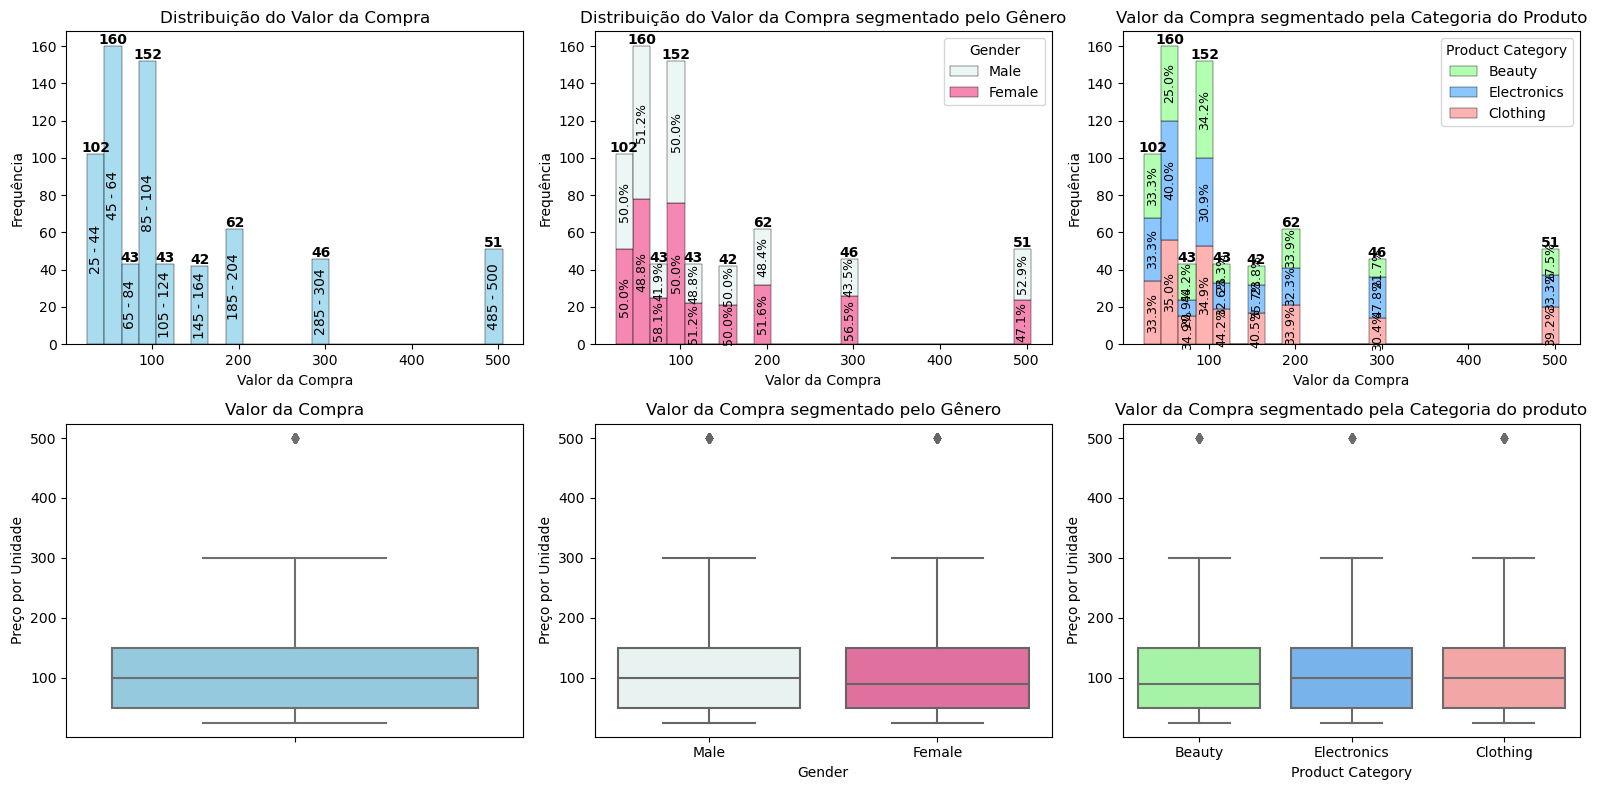

In [40]:
# Criação dos Grids 1x3
janela, graficos = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

# Gráfico 1 (Histograma do Total Amount limitado a 500)
#-----------
binwidth_value = 20  # Defina o tamanho do intervalo

histplot = sns.histplot(data=df_amount_menor_500, x='Total Amount', binwidth=binwidth_value, ax=graficos[0][0], color='skyblue', edgecolor="black", alpha=0.7, linewidth=0.3)
graficos[0][0].set_title('Distribuição do Valor da Compra', fontsize=12)
graficos[0][0].set_xlabel('Valor da Compra', fontsize=10)
graficos[0][0].set_ylabel("Frequência", fontsize=10)

cria_rotulos_barras(histrgrama=histplot, grid=graficos, posicao_grid=[0,0], fontsize= 10, binwidth_value=20)

rotula_intervalo_bins(DataFrame=df_amount_menor_500, column='Total Amount', histrgrama=histplot, grid=graficos, posicao_grid=[0,0], fontsize=10, binwidth_value=20)

# 📌 Gráfico 2 (Frequência + Percentuais por Gender)
histplot2 = sns.histplot(data=df_amount_menor_500, x='Total Amount', hue='Gender', binwidth=20, multiple="stack", ax=graficos[0][1], edgecolor="black", linewidth=0.3, palette=palete_gender)

cria_rotulos_barras(histrgrama=histplot, grid=graficos, posicao_grid=[0,1], fontsize= 10, binwidth_value=20)

rotula_percentual_segmentado_barras(histograma=histplot2, grid=graficos, posicao_grid=[0,1], fontsize=9)

# Customizações adicionais do gráfico 1
graficos[0][1].set_title('Distribuição do Valor da Compra segmentado pelo Gênero', fontsize=12)
graficos[0][1].set_xlabel('Valor da Compra', fontsize=10)
graficos[0][1].set_ylabel('Frequência', fontsize=10)

# Criação do gráfico 3
histplot3 = sns.histplot(data=df_amount_menor_500, x='Total Amount', hue='Product Category', binwidth=20,  multiple="stack", ax=graficos[0][2], edgecolor="black", linewidth=0.3, palette=palette_product_category)

cria_rotulos_barras(histrgrama=histplot, grid=graficos, posicao_grid=[0,2], fontsize= 10, binwidth_value=20)

rotula_percentual_segmentado_barras(histograma=histplot3, grid=graficos, posicao_grid=[0,2], fontsize=9)

# Customizações adicionais do gráfico 1
graficos[0][2].set_title('Valor da Compra segmentado pela Categoria do Produto', fontsize=12)
graficos[0][2].set_xlabel('Valor da Compra', fontsize=10)
graficos[0][2].set_ylabel('Frequência', fontsize=10)

sns.boxplot(data=df_amount_menor_500, y='Total Amount', color='skyblue', ax=graficos[1][0])
graficos[1][0].set_title('Valor da Compra', fontsize=12)
graficos[1][0].set_ylabel('Preço por Unidade', fontsize=10)

sns.boxplot(data=df_amount_menor_500, y='Total Amount', x='Gender', palette=palete_gender ,ax=graficos[1][1])
graficos[1][1].set_title('Valor da Compra segmentado pelo Gênero', fontsize=12)
graficos[1][1].set_ylabel('Preço por Unidade', fontsize=10)

sns.boxplot(data=df_amount_menor_500, y='Total Amount', x='Product Category', palette=palette_product_category, ax=graficos[1][2])
graficos[1][2].set_title('Valor da Compra segmentado pela Categoria do produto', fontsize=12)
graficos[1][2].set_ylabel('Preço por Unidade', fontsize=10)

# Exibir os gráficos
plt.tight_layout()
plt.show()

**Explicação**: Podemos notar que a maior frequência do ```Total Amount```(Valor da compra) se encontra entre $45 e $64. Esse já é um insight interessante pois poderíamos fazer alguma ação cacheback a partir de um determinado valor gasto, ou oferecer algum desconto para clientes desses nichos. Notamos também que nessa amostra o valor 500 já representa um outlier já que está mais distante dos demais dados.

### Análise Temporal

In [19]:
df.describe(include='datetime64[ns]')

,Date
count,1000
mean,2023-07-03 00:25:55.200000256
min,2023-01-01 00:00:00
25%,2023-04-08 00:00:00
50%,2023-06-29 12:00:00
75%,2023-10-04 00:00:00
max,2024-01-01 00:00:00


#### Atributo: ```Date```

In [ ]:
df_serie_temporal = df.sort_values(by='Date')
df_serie_temporal = df_serie_temporal.set_index('Date')

vendas_por_dia = df_serie_temporal.resample('D').size() # Criando a série de vendas por dia

datas_01 = vendas_por_dia.index[vendas_por_dia.index.day == 1] # Filtrando os dias 01 para usar como ticks no eixo X
labels_meses = [data.strftime('%b/%y') for data in datas_01] # Rótulos para o eixo X


Tendência & Sazonalidade & Ruídos

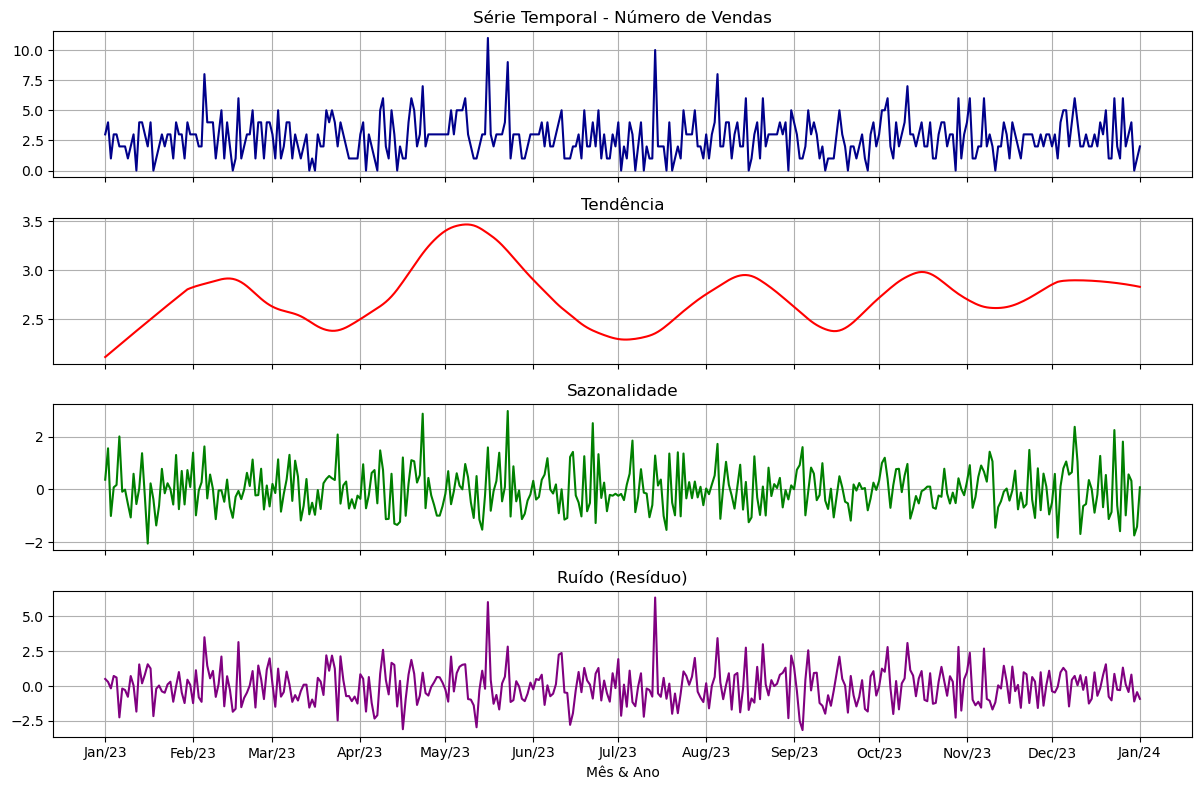

In [45]:
from statsmodels.tsa.seasonal import STL

# Aplicando a decomposição STL
stl = STL(vendas_por_dia, period=30)
resultado = stl.fit()

# Criando os gráficos
fig, axes = plt.subplots(4, 1, figsize=(12,8), sharex=True)

# Série original
axes[0].plot(vendas_por_dia.index, vendas_por_dia.values, color="darkblue")
axes[0].set_title("Série Temporal - Número de Vendas por dia")
axes[0].grid()

# Tendência
axes[1].plot(resultado.trend.index, resultado.trend.values, color="red")
axes[1].set_title("Tendência")
axes[1].grid()

# Sazonalidade
axes[2].plot(resultado.seasonal.index, resultado.seasonal.values, color="green")
axes[2].set_title("Sazonalidade")
axes[2].grid()

# Ruído (resíduo)
axes[3].plot(resultado.resid.index, resultado.resid.values, color="purple")
axes[3].set_title("Ruído (Resíduo)")
axes[3].grid()

# Ajustando os rótulos do eixo X
axes[3].set_xticks(datas_01)
axes[3].set_xticklabels(labels_meses)  # Rotação para melhor visualização

plt.xlabel("Mês & Ano")
plt.tight_layout()
plt.show()


**Conclusão**: Podemos notar uma tendência de alta onde a cada trimestre é apresentado um pico de vendas

Quantidade de vendas & Valor Vendido por dia

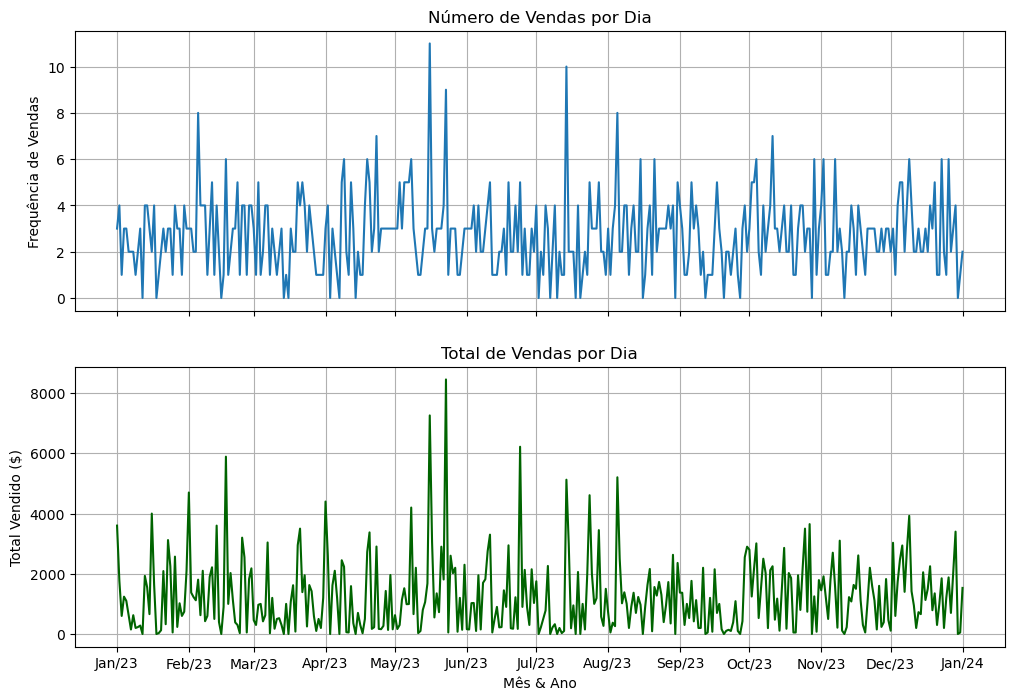

In [ ]:
# Criando a série do valor total de vendas por dia
total_vendas_por_dia = df_serie_temporal.resample('D')['Total Amount'].sum()

# Criando a figura com dois gráficos (subplots)
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Gráfico 1: Total de vendas por dia
axs[0].plot(vendas_por_dia.index, vendas_por_dia.values, label="Total de Vendas")
axs[0].set_ylabel("Frequência de Vendas")
axs[0].set_title("Número de Vendas por Dia")
axs[0].grid()


axs[1].plot(total_vendas_por_dia.index, total_vendas_por_dia.values, color='darkgreen')  # Alterando a cor para diferenciar
axs[1].set_ylabel("Total Vendido ($)")
axs[1].set_title("Total de Vendas por Dia")
axs[1].grid()

# Ajustando o eixo X para exibir apenas os dias 01
plt.xticks(datas_01, labels_meses)
plt.xlabel("Mês & Ano")

# Mostrando o gráfico
plt.show()


**Conclusão**: Podemos notar com mais clareza que o segundo trimestre do ano é o maior em quantidade de vendas e valor vendido, sendo Maio e Junho os únicos meses do ano que houveram vendas em todos os dias.

Analisando os dias que tiveram os maiores valores vendidos

In [ ]:
# Criando um DataFrame com a contagem de vendas e o total de vendas por dia
df_vendas_por_dia = df_serie_temporal.resample('D').agg(
    Número_de_vendas=('Product Category', 'size'),  # Contagem de vendas por dia
    Total_vendido=('Total Amount', 'sum')  # Soma do total vendido por dia
)

In [ ]:
# Selecionando os 10 dias com maior número de vendas
top_10_maiores_vendas = df_vendas_por_dia.nlargest(10, 'Total_vendido').reset_index()
top_10_maiores_vendas['Mês'] = top_10_maiores_vendas['Date'].dt.month_name() # Adicionando o mês
top_10_maiores_vendas['Dia da Semana'] = top_10_maiores_vendas['Date'].dt.day_name() # Adicionando o dia da semana

dias_da_semana = {
    'Monday': 'Segunda feira',
    'Tuesday': 'Terça feira',
    'Wednesday': 'Quarta feira',
    'Thursday': 'Quinta feira',
    'Friday': 'Sexta feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

top_10_maiores_vendas["Dia da Semana"] = top_10_maiores_vendas["Dia da Semana"].replace(dias_da_semana)
top_10_maiores_vendas

,Date,Número_de_vendas,Total_vendido,Mês,Dia da Semana
0,2023-05-23,9,8455,May,Terça feira
1,2023-05-16,11,7260,May,Terça feira
2,2023-06-24,5,6220,June,Sábado
3,2023-02-17,6,5890,February,Sexta feira
4,2023-08-05,8,5205,August,Sábado
5,2023-07-14,10,5125,July,Sexta feira
6,2023-02-01,3,4700,February,Quarta feira
7,2023-07-24,5,4610,July,Segunda feira
8,2023-04-01,3,4400,April,Sábado
9,2023-05-08,6,4200,May,Segunda feira


**Conclusão**:

Analisando os dias que hão houveram vendas

In [ ]:
sem_vendas = df_vendas_por_dia.reset_index().query("Número_de_vendas == 0")
sem_vendas['Mês'] = sem_vendas['Date'].dt.month_name() # Adicionando o mês
sem_vendas['Dia da Semana'] = sem_vendas['Date'].dt.day_name() # Adicionando o dia da semana
sem_vendas["Dia da Semana"] = sem_vendas["Dia da Semana"].replace(dias_da_semana)

percentual_dias_sem_venda = round((len(sem_vendas) / 365) * 100,2)
print(f'{percentual_dias_sem_venda}% dos dias de 2023 a loja não fez nenhuma venda, sendo ao todo {len(sem_vendas)} dias')

5.75% dos dias de 2023 a loja não fez nenhuma venda, sendo ao todo 21 dias


In [128]:
valor_nao_recebido = round(vendas_por_dia['Total_vendido'].mean() * len(sem_vendas), 2)

print(f"Como não houve vendas ao longo de {len(sem_vendas)} dias no ano, a empresa deixou de receber em média aproximadamente ${valor_nao_recebido}")

Como não houve vendas ao longo de 21 dias no ano, a empresa deixou de receber em média aproximadamente $26163.93


In [129]:
sem_vendas

,Date,Número_de_vendas,Total_vendido,Mês,Dia da Semana
11,2023-01-12,0,0,January,Quinta feira
17,2023-01-18,0,0,January,Quarta feira
45,2023-02-15,0,0,February,Quarta feira
72,2023-03-14,0,0,March,Terça feira
74,2023-03-16,0,0,March,Quinta feira
92,2023-04-03,0,0,April,Segunda feira
96,2023-04-07,0,0,April,Sexta feira
103,2023-04-14,0,0,April,Sexta feira
182,2023-07-02,0,0,July,Domingo
187,2023-07-07,0,0,July,Sexta feira


**Conclusão**:

Analisando as vendas por dia da semana

In [ ]:
vendas_por_dias_da_semana = df_vendas_por_dia.reset_index()
vendas_por_dias_da_semana['Dia da Semana'] = vendas_por_dias_da_semana['Date'].dt.day_name()
vendas_por_dias_da_semana["Dia da Semana"] = vendas_por_dias_da_semana["Dia da Semana"].replace(dias_da_semana)
vendas_por_dias_da_semana.groupby('Dia da Semana')[['Número_de_vendas','Total_vendido']].sum().sort_values(by='Total_vendido', ascending=False)

,Número_de_vendas,Total_vendido
Dia da Semana,,
Sábado,150,78815
Segunda feira,146,70250
Terça feira,161,69440
Sexta feira,143,66290
Quarta feira,139,58770
Domingo,138,58600
Quinta feira,123,53835


**Conclusão**:

## 6. Conclusão

1. Mais de 11% dos clientes na nossa amostra possui 60 ou mais anos de idade, uma ótima ideia seria investir em ações para estimular a compra de produtos desse público.
2. Aproximadamente 75% dos clientes tem o comportamento de comprar mais de 1 produto, insight importantíssimo para uma ação de marketing privilegiando a compra de combos de produtos. Caso seja feita de forma segmentada, dar preferência para o público feminino e a categoria ```Clothing``` e ```Eletronics```
3. Produtos no valor de $30 representam a menor categoria adquirida, o que é estranho já que protudos de $50 e $25 estão nos top produtos mais adquiridos.
4. Maio e Junho foram os meses com maior quantidade de vendas e valor vendido, inclusive sendo os únicos meses do ano em que todos os dias houveram vendas;
5. Em 21 dias do ano não houveram vendas, fazendo com a empresa deixasse de faturar em média aproximadamente $26.163,93.
